<a href="https://colab.research.google.com/github/216d0136/python_practice/blob/master/lesson9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 3s 6ms/step - loss: 2.2849 - accuracy: 0.1589 - val_loss: 2.2590 - val_accuracy: 0.4109
Epoch 2/12
469/469 [==============================] - 3s 6ms/step - loss: 2.2391 - accuracy: 0.2936 - val_loss: 2.2012 - val_accuracy: 0.5508
Epoch 3/12
469/469 [==============================] - 3s 6ms/step - loss: 2.1773 - accuracy: 0.3961 - val_loss: 2.1221 - val_accuracy: 0.6086
Epoch 4/12
469/469 [==============================] - 3s 6ms/step - loss: 2.0932 - accuracy: 0.4649 - val_loss: 2.0137 - val_accuracy: 0.6579
Epoch 5/12
469/469 [==============================] - 3s 6ms/step - loss: 1.9803 - accuracy: 0.5167 - val_loss: 1.8694 - val_accuracy: 0.6913
Epoch 6/12
469/469 [==============================] - 3s 6ms/step - loss: 1.8372 - accuracy: 0.5561 - val_loss: 1.6900 - val_accuracy: 0.7199
Epoch 7/12
469/469 [==============================] - 3s 6ms/step - loss: 1

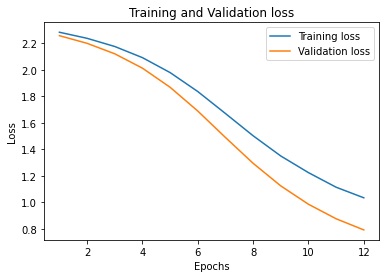

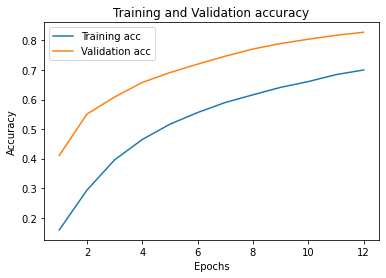

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

"""
mnist: 手書き数字画像データセット
Sequential: Kerasを用いてモデルを生成するためのモジュール
Dense: 全結合層のレイヤモジュール
Dropout: ドロップアウトモジュール
Conv2D: 2次元畳み込み層のモジュール
MaxPool2D: 2次元最大プーリング層のモジュール
Flatten: 入力を平滑化するモジュール
"""

batch_size = 128
num_classes = 10
epochs = 12


img_rows, img_cols = 28, 28


(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:

    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 入力データの各画素値を0-1の範囲で正規化(学習コストを下げるため)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# ラベルをバイナリベクトルとして扱う
# Kerasはラベルを数値ではなく、0or1を要素に持つベクトルで扱うため

"""
例えば、サンプルに対するターゲットが「5」の場合次のような形になります。
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
"""
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# CNNネットワークの構築
# 畳み込みフィルターのサイズ(kernel_size)は3×3。整数か単一の整数からなるタプル/リストで指定
# https://keras.io/ja/layers/convolutional/
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


score=model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('test acc:', score[1])


epochs = range(1, len(hist.history['accuracy']) + 1)

plt.plot(epochs, hist.history['loss'], label='Training loss', ls='-') 
plt.plot(epochs, hist.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, hist.history['accuracy'],  label='Training acc') 
plt.plot(epochs, hist.history['val_accuracy'], label="Validation acc")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()